In [1]:
from io import StringIO

import numpy as np
from DataHandler import DataHandler
from DecisionTreeHandler import DecisionTreeHandler
import matplotlib.pyplot as plt

In [2]:
datasetFileName = 'ObesityData.csv'
ordinalFeaturesMappers = {
    ("CAEC", "CALC"): ["no", "Sometimes", "Frequently", "Always"]
}

**Loading Data**

In [3]:
dataHandler = DataHandler()
dataHandler.loadDataFrom(datasetFileName)

**Preprocessing Data**

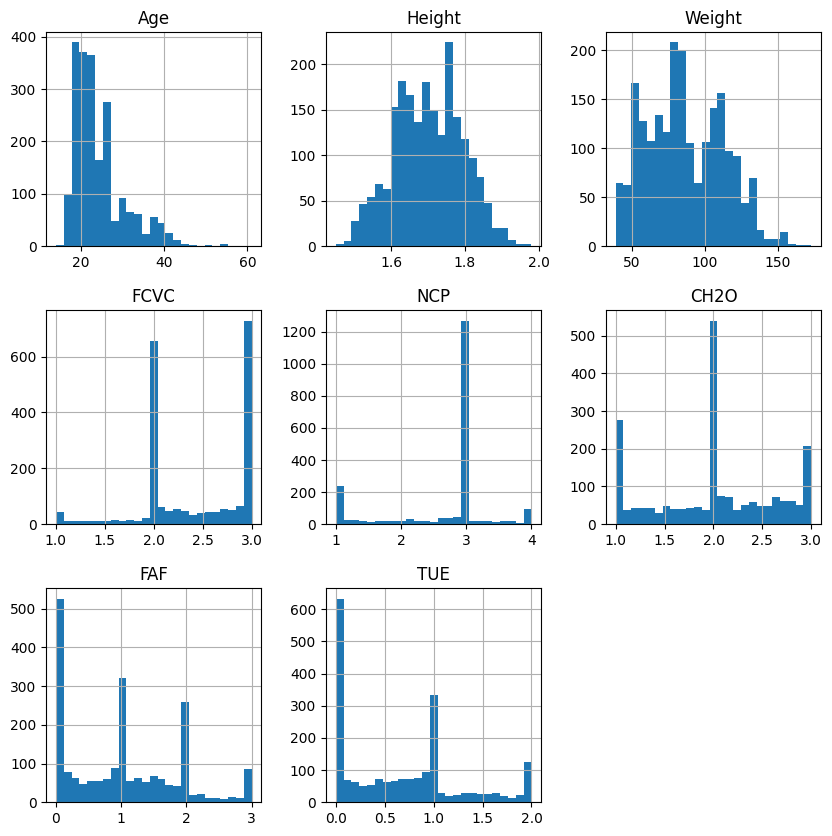

Any missing values?  False


In [7]:
dataHandler.dataset.hist(bins=25,figsize=(10,10))
plt.show()

print("Any missing values? ", dataHandler.dataset.isnull().values.any())

preparedData = dataHandler.encodeData(ordinalFeaturesMappers)

**Basic Tree**

In [5]:
accuracyList = DecisionTreeHandler().repeatKFoldsNTimes(preparedData, 10, 10)
print("mean accuracy", np.mean(accuracyList))
print("standard deviation", np.std(accuracyList))

mean accuracy 0.9124125905392111
standard deviation 0.01899726991799208


**Max Depth**

In [44]:
max_MAX_DEPTH = 12

means = []
deviations = []

for depth in range(1, max_MAX_DEPTH+1):
    MAX_DEPTH = depth
    accuracyList = DecisionTreeHandler(MAX_DEPTH).repeatKFoldsNTimes(preparedData, 10, 10)
    means.append(np.mean(accuracyList))
    deviations.append(np.std(accuracyList))

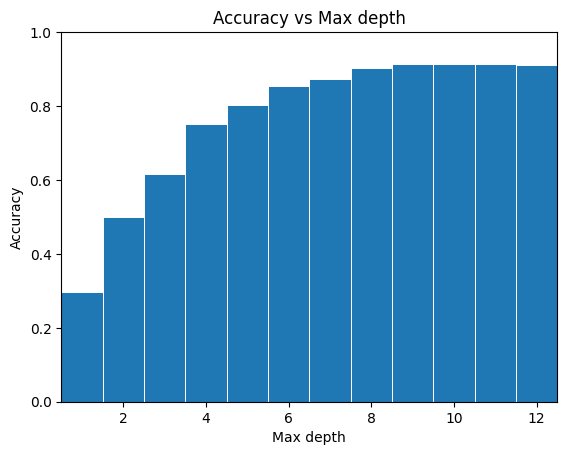

In [47]:
fig, ax = plt.subplots()

ax.bar([i for i in range(1, max_MAX_DEPTH+1)], means, width=1, edgecolor="white", linewidth=0.7)

ax.set(ylim=(0, 1), xlim=(0.5,max_MAX_DEPTH+0.5), xlabel="Max depth", ylabel="Accuracy", title="Accuracy vs Max depth")

plt.show()

**Generating Tree Graph**

In [ ]:
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('tree.png')
# Image(graph.create_png())